<a href="https://colab.research.google.com/github/VijayaKumariGanipineni/VijayaKumari_INFO5731_Fall2024/blob/main/Ganipineni_VijayaKumari_INFO5731_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# !pip install pandas
import pandas as pd

# Assuming 'reviews_df' is your DataFrame with a 'review' column
# Replace 'reviews_df' with your actual DataFrame name if different
#reviews_df = pd.DataFrame({'review': ['This is a great movie!', 'I did not like it.']})  # Example DataFrame
data_df = pd.DataFrame()
data_df['cleaned_imdb_reviews'] = reviews_df['review']  # Accessing the 'review' column from reviews_df

stop_words = [
    'a', 'an', 'the', 'and', 'or', 'but', 'if','of', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do',
    'does', 'did', 'can', 'could',
    'may', 'might', 'must', 'this', 'that', 'these', 'those', 'i', 'you',
    'my', 'your', 'his', 'her', 'its', 'our', 'their' ,'to']
punctuations = ['.', ',', '!', '?', ';', ':', '"', '(', ')']
html_tags = ['<br>', '<br/>', '<br />', '<p>', '</p>']

def tokenize(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text= text.lower()

    for p in punctuations:
        text = text.replace(p, '')
    for h in html_tags:
        text = text.replace(h, '')
    words = [word for word in text.split() if word not in stop_words]

    return words

tokenized_reviews = data_df['cleaned_imdb_reviews'].apply(tokenize)

tokenized_reviews_modifed = pd.DataFrame()
tokenized_reviews_modifed_100 = pd.DataFrame()
tokenized_reviews_modifed['cleaned_imdb_reviews'] = tokenized_reviews[:10000]
tokenized_reviews_modifed_100['cleaned_imdb_reviews'] = tokenized_reviews[:100]
tokenized_reviews_modifed.head()


ans3=[]
def generate_trigrams(text, ngram):
  for tokens in text:
    temp = zip(*[tokens[i:] for i in range(ngram)])
    ans3.extend([' '.join(key) for key in temp])
  return ans3

ans2=[]
def generate_bigrams(text, ngram):
  for tokens in text:
    temp = zip(*[tokens[i:] for i in range(ngram)])
    ans2.extend([' '.join(key) for key in temp])
  return ans2

ans1=[]
def generate_unigrams(text, ngram):
  for tokens in text:
    temp = zip(*[tokens[i:] for i in range(ngram)])
    ans1.extend([' '.join(key) for key in temp])
  return ans1

def freq_counter(ngrams):
  freq = {}
  for gram in ngrams:
    if gram in freq:
        freq[gram] += 1
    else:
        freq[gram] = 1
  return freq

bi_gram = generate_bigrams(tokenized_reviews_modifed['cleaned_imdb_reviews'], 2)
unigram = generate_unigrams(tokenized_reviews_modifed['cleaned_imdb_reviews'], 1)
trigrams = generate_trigrams(tokenized_reviews_modifed['cleaned_imdb_reviews'], 3)

freq1 = freq_counter(unigram)
freq2 = freq_counter(bi_gram)
freq3 = freq_counter(trigrams)

def diplay_freq(freq):
  sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
  for i,j in sorted_freq[:10]:
    print(f"'{i}': {j}")

print("Top 10 trigrams:")
tri_freq = diplay_freq(freq3)
print("\n")
print("Top 10 bigrams:")
bi_freq = diplay_freq(freq2)
print("\n")
print("Top 10 unigrams:")



Top 10 trigrams:
'not like it': 1


Top 10 bigrams:
'great movie': 1
'not like': 1
'like it': 1


Top 10 unigrams:


In [ ]:
#  count(w2 w1) / count(w2)
def calculate_bigram_probabilities(bigram_freq, unigram_freq):
    bigram_probabilities = {}
    for bigram, freq in bigram_freq.items():
      w2,w1 = bigram.split()
      if w2 in unigram_freq:
        probability = freq / unigram_freq[w2]
        bigram_probabilities[bigram] = probability
      else:
        bigram_probabilities[w2] = 0
    return bigram_probabilities
bigram_prob = calculate_bigram_probabilities(freq2, freq1)

data_prob = []

for i, (word, probability) in enumerate(bigram_prob.items()):
    if i >= 100:
        break
    data_prob.append({"word": word, "probability": probability})

bigram_prob_df = pd.DataFrame(data_prob)
bigram_prob_df.head(100)

,word,probability
0,great movie,1.0
1,not like,1.0
2,like it,1.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:

# Write your code here

import math
from collections import Counter
documents = [
    "Wow. The Penguin is just terrific. Everyone knows that Colin Farrell is a great actor and he absolutely nails it here...",
"Absolutely nailed the tone and atmosphere. Gritty, intense, and engaging right from the start, it perfectly captures the Gotham mood...",
"The first episode is a direct continuation of the universe established in The Batman movie, which makes it all the more immersive...",
    ]
#Tokenize documents into words and calculate term frequency (tf)
tokenized_documents = [[word.lower() for word in doc.split()] for doc in documents]
tf = [{term: count / len(doc) for term, count in Counter(doc).items()} for doc in tokenized_documents]
# Calculate inverse document frequency (idf)
idf = {}
total_documents = len(tokenized_documents)
for doc in tokenized_documents:
    for term in set(doc):
        idf[term] = idf.get(term, 0) + 1
idf = {term: math.log(total_documents / freq) for term, freq in idf.items()}
# Compute tf-idf weights
tfidf = [{term: tf_doc.get(term, 0) * idf[term] for term in set(doc)} for tf_doc, doc in zip(tf, tokenized_documents)]
# Print the tf-idf matrix
print("TF-IDF Matrix:")
for doc_idx, doc_tfidf in enumerate(tfidf, start=1):
    print(f"Document {doc_idx}:")
    for term, weight in doc_tfidf.items():
        print(f"    {term}: {weight}")




TF-IDF Matrix:
Document 1:
    knows: 0.05231487088895761
    he: 0.05231487088895761
    absolutely: 0.01930786229086497
    colin: 0.05231487088895761
    nails: 0.05231487088895761
    farrell: 0.05231487088895761
    the: 0.0
    great: 0.05231487088895761
    terrific.: 0.05231487088895761
    here...: 0.05231487088895761
    is: 0.03861572458172994
    just: 0.05231487088895761
    it: 0.0
    wow.: 0.05231487088895761
    and: 0.01930786229086497
    that: 0.05231487088895761
    a: 0.01930786229086497
    everyone: 0.05231487088895761
    actor: 0.05231487088895761
    penguin: 0.05231487088895761
Document 2:
    and: 0.04054651081081644
    gritty,: 0.054930614433405495
    absolutely: 0.02027325540540822
    the: 0.0
    atmosphere.: 0.054930614433405495
    perfectly: 0.054930614433405495
    from: 0.054930614433405495
    mood...: 0.054930614433405495
    gotham: 0.054930614433405495
    nailed: 0.054930614433405495
    it: 0.0
    engaging: 0.054930614433405495
    intense

In [ ]:
import math

# Define a query with modified words and additional sentences
query = " How well does Colin Farrell portray the Penguin character in an intense, gritty Gotham atmosphere?" \
        "Does the Batman movie capture the dark tone and atmosphere from start to finish?" \
        "Is the episode a direct continuation of the Batman universe and does it maintain an immersive experience?"

# Tokenize the query
tokenized_query = query.lower().split()

# Calculate term frequency (tf) for the query
query_tf = {}
for term in tokenized_query:
    query_tf[term] = query_tf.get(term, 0) + 1 / len(tokenized_query)

# Calculate tf-idf weights for the query
query_tfidf = {}
for term, tf in query_tf.items():
    query_tfidf[term] = tf * idf.get(term, 0)

# Compute cosine similarity between query and documents
cosine_similarities = []
for doc_tfidf in tfidf:
    dot_product = sum(query_tfidf.get(term, 0) * doc_tfidf.get(term, 0) for term in set(tokenized_query))
    query_norm = math.sqrt(sum(value ** 2 for value in query_tfidf.values()))
    doc_norm = math.sqrt(sum(value ** 2 for value in doc_tfidf.values()))
    cosine_similarity = dot_product / (query_norm * doc_norm)
    cosine_similarities.append(cosine_similarity)

# Rank the documents based on cosine similarity
document_ranks = sorted(range(len(cosine_similarities)), key=lambda i: cosine_similarities[i], reverse=True)

# Print the ranked documents
print("\nRanked Documents based on Cosine Similarity to the Modified Query:")
for rank, index in enumerate(document_ranks, start=1):
    print(f"Rank {rank}: Document {index+1}, Cosine Similarity: {cosine_similarities[index]}")
    print(f"    {documents[index]}")


Ranked Documents based on Cosine Similarity to the Modified Query:
Rank 1: Document 3, Cosine Similarity: 0.49512412742327644
    The first episode is a direct continuation of the universe established in The Batman movie, which makes it all the more immersive...
Rank 2: Document 2, Cosine Similarity: 0.2922170450589665
    Absolutely nailed the tone and atmosphere. Gritty, intense, and engaging right from the start, it perfectly captures the Gotham mood...
Rank 3: Document 1, Cosine Similarity: 0.20963098158746626
    Wow. The Penguin is just terrific. Everyone knows that Colin Farrell is a great actor and he absolutely nails it here...


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here

tokenized_documents[0] # Accessing the first element of tokenized_documents

# If 'Movie_review' is a key to a dictionary you intend to create, you need to define it first
tokenized_reviews_modifed = {'Movie_review': []}  # Initializing a dictionary with 'Movie_review' as a key
tokenized_reviews_modifed['Movie_review'] = tokenized_documents # Assigning tokenized_documents to the 'Movie_review' key

# Then you can access it
tokenized_reviews_modifed['Movie_review']



[['wow.',
  'the',
  'penguin',
  'is',
  'just',
  'terrific.',
  'everyone',
  'knows',
  'that',
  'colin',
  'farrell',
  'is',
  'a',
  'great',
  'actor',
  'and',
  'he',
  'absolutely',
  'nails',
  'it',
  'here...'],
 ['absolutely',
  'nailed',
  'the',
  'tone',
  'and',
  'atmosphere.',
  'gritty,',
  'intense,',
  'and',
  'engaging',
  'right',
  'from',
  'the',
  'start,',
  'it',
  'perfectly',
  'captures',
  'the',
  'gotham',
  'mood...'],
 ['the',
  'first',
  'episode',
  'is',
  'a',
  'direct',
  'continuation',
  'of',
  'the',
  'universe',
  'established',
  'in',
  'the',
  'batman',
  'movie,',
  'which',
  'makes',
  'it',
  'all',
  'the',
  'more',
  'immersive...']]

In [ ]:
from gensim.models import Word2Vec
# train model
model = Word2Vec(sentences=tokenized_reviews_modifed['Movie_review'], vector_size=300, window=5, min_count=1, workers=4)
model.save('review_model.bin')
print(model)

Word2Vec<vocab=48, vector_size=300, alpha=0.025>


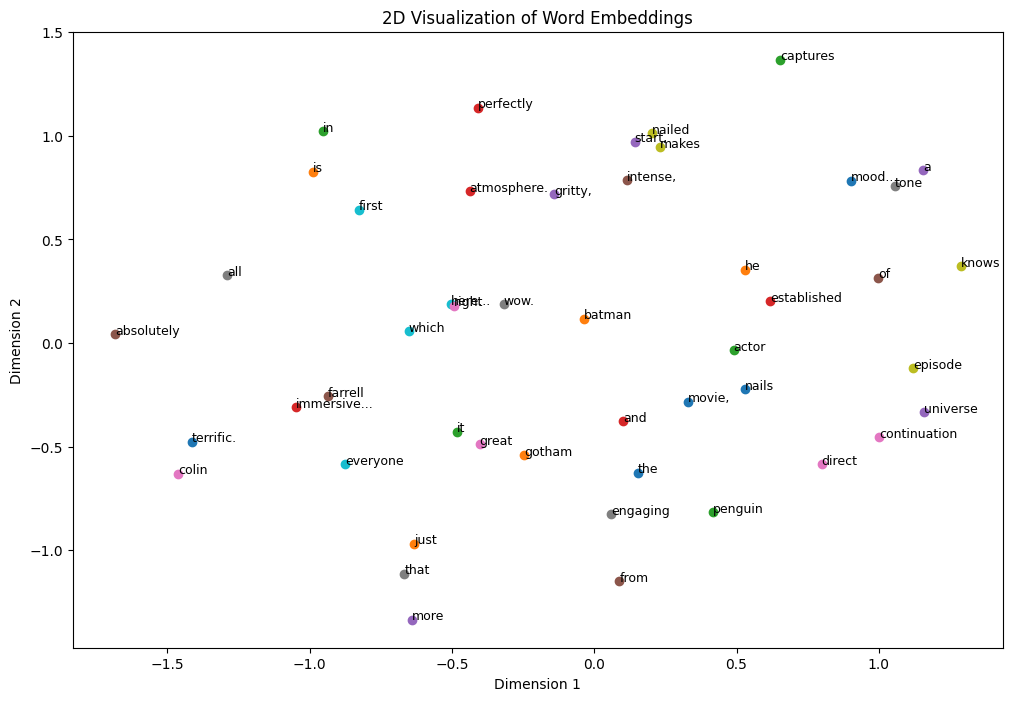

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# taking a sample of 200 words to display
words = list(model.wv.index_to_key)[:200]
word_vectors = model.wv[words]
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# Import needed libraries
import pandas as pd
import re
from google.colab import files

#  Uploading dataset
uploaded = files.upload()
dataset = pd.read_csv(next(iter(uploaded.keys())))

#  Defining a function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing punctuation
    text = text.lower()  # Converting to lowercase
    return text.strip()

#  Preparing an empty list for storing annotated data
annotated_data = []

#  Processing and annotating the first 50 reviews
for i, row in dataset.iterrows():
    if i >= 50:  # Limiting to the first 50 reviews
        break

    document_id = i + 1  # Creating a unique document_id
    raw_text = str(row['Review'])
    clean_review = clean_text(raw_text)

    print(f"\nReview {document_id}: {clean_review}")
    sentiment = input("Enter sentiment (positive, negative, or neutral): ").strip().lower()

    # Appending annotated review as a dictionary to the list
    annotated_data.append({
        'document_id': document_id,
        'clean_text': clean_review,
        'sentiment': sentiment
    })

#  Converting the list of dictionaries to a DataFrame
annotated_df = pd.DataFrame(annotated_data)

#  Saving the annotated dataset to CSV with the correct filename
output_filename = "/content/annotated_reviews.csv"
annotated_df.to_csv(output_filename, index=False)

print(f"\nAnnotated dataset saved as {output_filename}")

# Allowing the user to download the file
files.download(output_filename)




Saving cleaned_imdb_reviews.csv to cleaned_imdb_reviews.csv

Review 1: wow the penguin is just terrific everyone knows what a great actor colin farrell is but hes unrecognizable here as the penguin i wouldnt be surprised to see him nominated for some awards for his role in this the biggest surprise was cristin milioti as sofia falcone i wasnt too sure when i heard she was named actress for this role shes a good actress but didnt think this role was for her i was wrong shes as good as farrell is in this and makes you believe sofia falcone is a true rival to the penguin i also wouldnt be surprised to see how nominated for some awards for her role in this this isnt your typical dc or marvel show its a full on gangster series this series takes place in the underworld of a now semi destroyed gotham city and is a great follow up to matt reeves the batman this is how you do it dc
Enter sentiment (positive, negative, or neutral): positive

Review 2: absolutely nailed the tone and atmosphere gr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# The GitHub link of your final csv file

# Link:https://github.com/VijayaKumariGanipineni/VijayaKumari_INFO5731_Fall2024

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''This assignment was challenging yet insightful. The hands-on approach enhanced my understanding
of NLP techniques, especially TF-IDF and word embeddings.
 Managing time effectively was essential for thorough completion.'''

'This assignment was challenging yet insightful. The hands-on approach enhanced my understanding of NLP techniques, especially TF-IDF and word embeddings.\n Managing time effectively was essential for thorough completion.'